# Open Cosmos Data Engineering Challenge

The data to run this notebook can be downloaded in CLI by running `python opencosmos/sh/s2_download.py`. If you choose to try customised download, try the command with `--help`.

__Note__: Make sure to increase the resolution from a default `10m`, if you prefer a bigger region of interest (current default is London)

In [2]:
# Import libraries
import os
import sys
import numpy as np
from PIL import Image
import rasterio as rio
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

# Adding project source folder to the sys path
module_path = os.path.abspath(os.path.join('..'))
if not module_path in sys.path:
    sys.path.append(module_path) 

from opencosmos.utils import plot_image

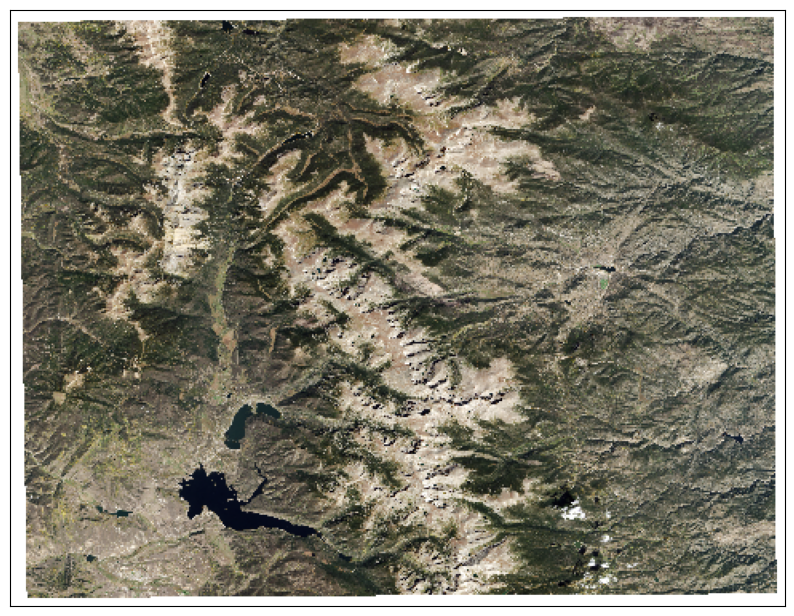

<Axes: >

In [3]:
# Reading Raster image
src = rio.open("../data/processed/Sentinel2_visual_processed.tiff", count = 3)
blue = src.read(1)
green = src.read(2)
red = src.read(3)

from earthpy.io import path_to_example
with rio.open(path_to_example('rmnp-rgb.tif')) as src:
    img_array = src.read()
# Ensure the input array doesn't have nodata values like -9999
ep.plot_rgb(img_array)

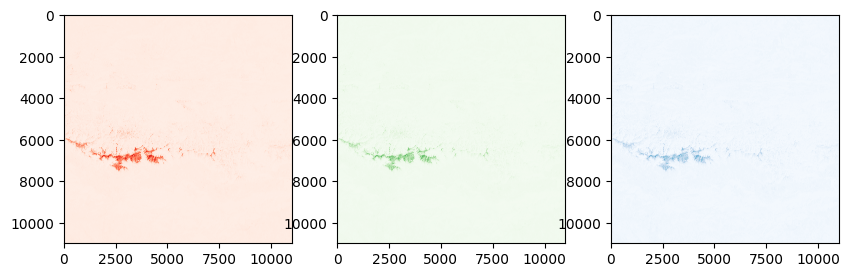

In [4]:
# Blue, Green, Red bands visualisation
fig = plt.figure(figsize=(10,3))
ax1 = fig.add_subplot(1,3,1)
ax1.imshow(red, cmap='Reds')
ax1 = fig.add_subplot(1,3,2)
ax1.imshow(green, cmap='Greens')
ax1 = fig.add_subplot(1,3,3)
ax1.imshow(blue, cmap='Blues')

In [5]:
# Normalise pixel values
def normalize(band):
    band_min, band_max = (band.min(), band.max())
    return ((band-band_min)/((band_max - band_min)))

rgb_normalised = normalize(rgb_stack)
rgb = ep.plot_rgb(
    arr = rgb_normalised, rgb = (1, 2, 3),
    figsize =(20, 10) #, title = titles
)

plt.show()

IndexError: index 3 is out of bounds for axis 0 with size 3

In [ ]:
# Plotting the PNG image
png_path = "../data/png/9b54c4521eebd135897649ec5c896ec4/response.png"
png_data = Image.open(png_path)
png_array = np.array(png_data)
plot_image(png_array, factor=3.5 / 255, clip_range=(0, 1))